In [46]:
# Import necessary libraries for data manipulation, numerical operations, and visualization.

import numpy as np  # For numerical computations, especially array operations.
import pandas as pd # For data manipulation and analysis, primarily using DataFrames.
import matplotlib.pyplot as plt # For creating static, interactive, and animated visualizations.
import seaborn as sns # Based on matplotlib, provides a high-level interface for drawing attractive statistical graphics.

# Set a consistent style for seaborn plots for better aesthetics.
sns.set_style("whitegrid")

# --- Configuration ---
# Set a seed for numpy's random number generator for reproducibility of certain operations if needed later.
np.random.seed(42)

# Configure pandas display options to show all columns if desired (useful for wide dataframes).
pd.set_option('display.max_columns', None)

# Data Exploration

In [47]:
# Load the dataset and perform initial exploratory data analysis (EDA) to understand its structure and contents.

# Define the path to the dataset.
file_path = 'heart_disease_dataset_UCI.csv' 

# Load the dataset into a pandas DataFrame.
# It's good practice to use a try-except block for file operations.
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please check the file path.")
    # Raise the exception if not found.
    raise

In [48]:
# --- Initial Data Exploration ---

# Display the first 10 rows of the DataFrame to get a feel for the data.
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [49]:
# Get a concise summary of the DataFrame.
# This includes the data type of each column and the number of non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [50]:
# Check for missing values in each column.
# .sum(): counts the number of True values (NaNs) for each column.
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [51]:
# Group data by 'sex' and calculate the mean for other features.
# This can provide insights into how features differ between sexes.
# (Assuming 'sex' is a column in your dataset; 0 for female, 1 for male typically)
# It is more insightful to group by sex and see means of all features including the target.
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


# Data Visualization

Displaying histograms for all numerical features...


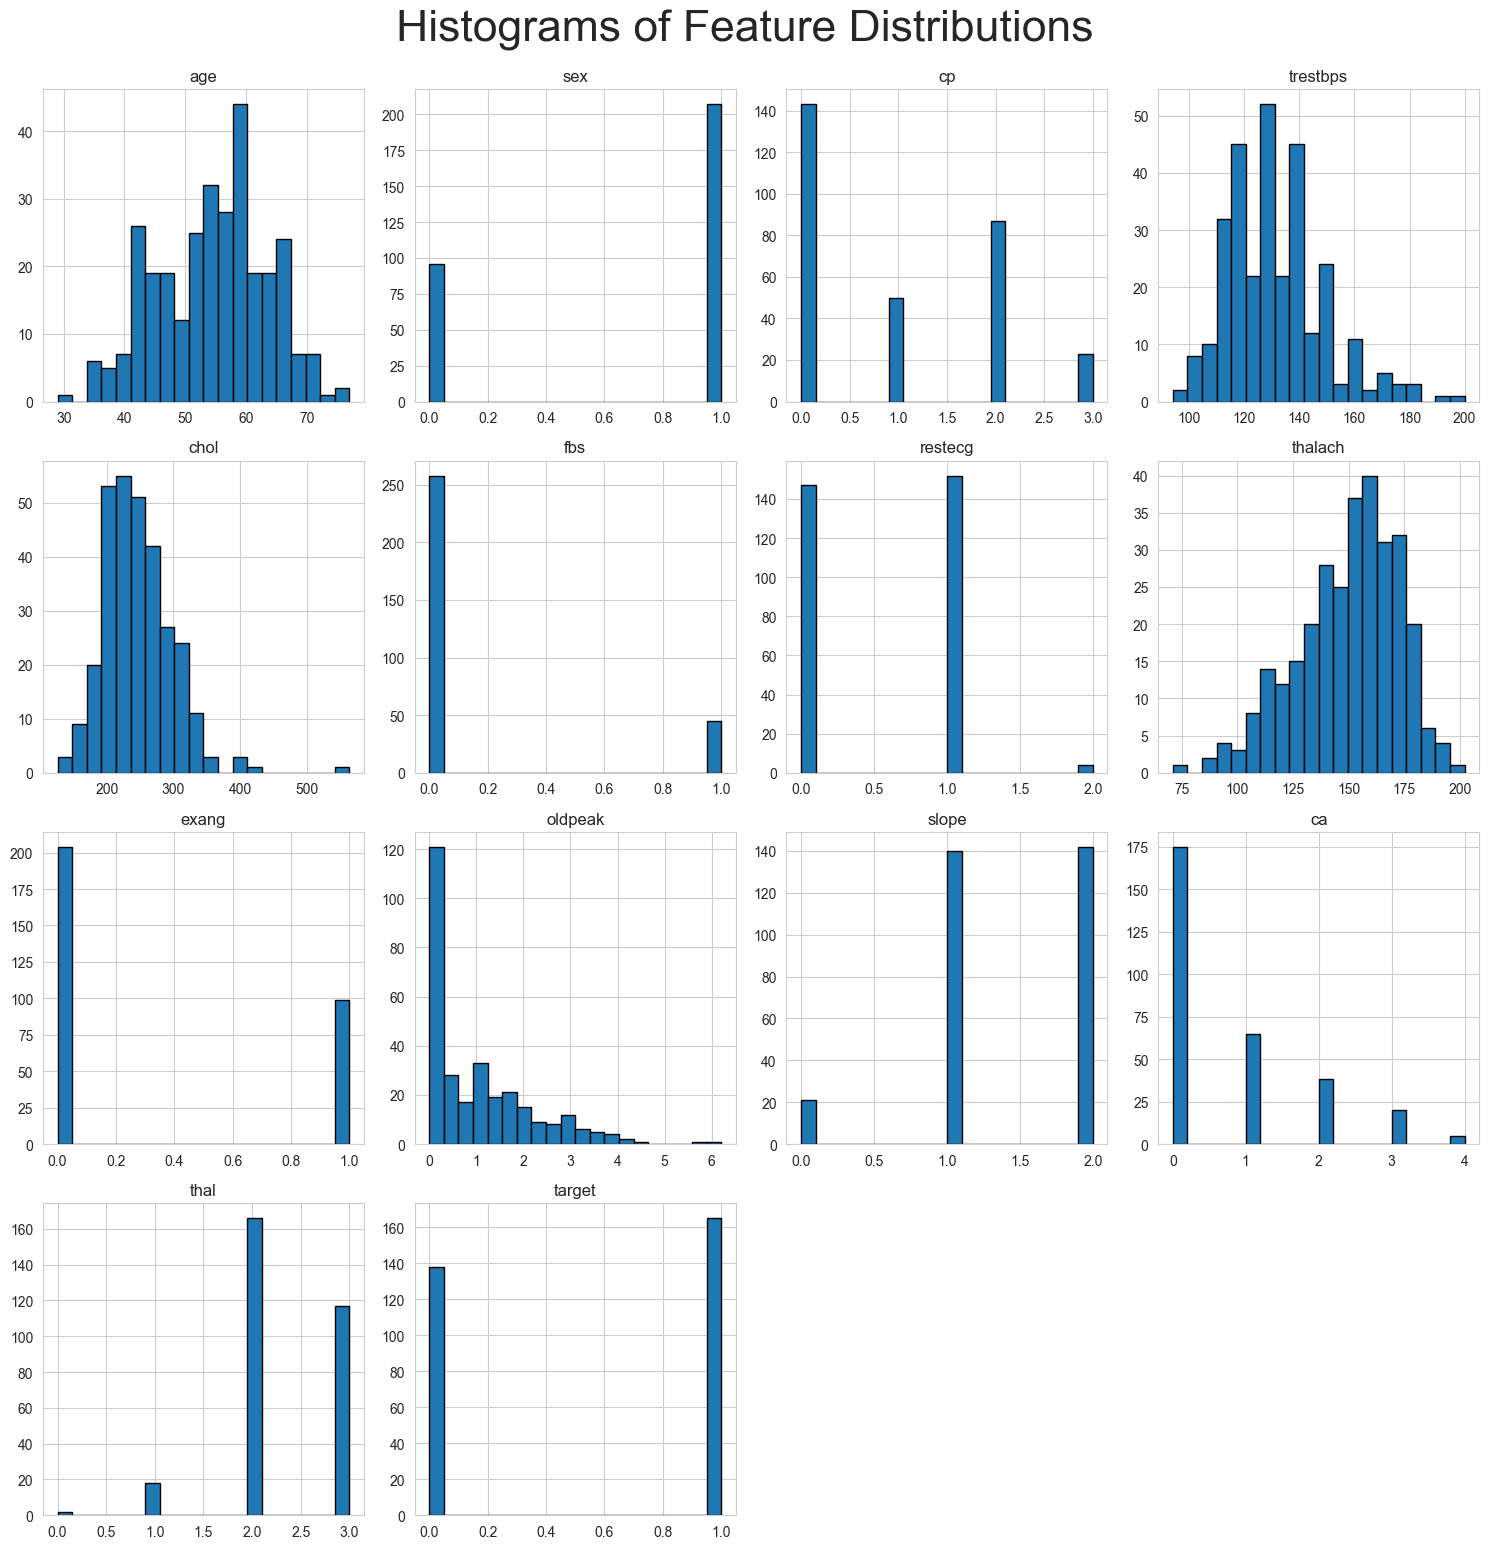

In [52]:
print("Displaying histograms for all numerical features...")
# Plot histograms for all columns in the DataFrame.
# figsize controls the size of the entire figure containing all subplots.
df.hist(figsize=(15, 15), bins=20, edgecolor='black') # Added bins and edgecolor for clarity
plt.tight_layout()  # Adjusts subplot params for a tight layout.
plt.suptitle("Histograms of Feature Distributions", y=1.03, fontsize=32) # Add a main title
plt.show() # Ensure plots are displayed.

# Data Pre Processing

In [53]:
# Separate features (X) and the target variable (y).
# Then, scale the features.

# Assuming the first 13 columns (index 0 to 12) are features
# and the 14th column (index 13) is the target variable.
num_features = 13
target_column_index = 13

# X: Features (independent variables)
X = df.iloc[:, 0:num_features]
# y: Target (dependent variable)
y = df.iloc[:, target_column_index]

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (303, 13)
Shape of target (y): (303,)


In [54]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [55]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [56]:
# --- Feature Scaling ---

# Why scale?
# Algorithms like Logistic Regression, SVM, and KNN are sensitive to the scale of input features.
# StandardScaler standardizes features by removing the mean and scaling to unit variance (Z-score normalization).
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
# If a dataset’s features are already on similar scales or do not suffer from extreme variance, standardization has minimal impact.

# Create an instance of the StandardScaler
# This scaler standardizes features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Apply the scaler to the dataset X
# The fit_transform() method does two things:
# 1. .fit(X): Computes the mean and standard deviation for each feature in X.
# 2. .transform(X): Applies the scaling to X using the formula:
#    X_scaled = (X - mean) / standard_deviation
# The result is a new NumPy array where each feature has:
# - a mean of approximately 0
# - a standard deviation of 1
# Note: In production or during model deployment, always fit on training data and transform test data.
X_scaled = scaler.fit_transform(X) # Returns a NumPy array

# Optionally, convert the scaled NumPy array back to a DataFrame for readability
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled feature set
print("First 5 rows of scaled features (X_scaled_df):")
X_scaled_df.head()

First 5 rows of scaled features (X_scaled_df):


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [60]:
# --- Train-Test Split ---

# Split the data into training and testing sets.
# This allows us to evaluate the model's performance on unseen data.
from sklearn.model_selection import train_test_split

# test_size=0.25 means 25% of the data will be used for testing.
# random_state ensures that the split is the same every time the code is run, for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df, y, test_size=0.25, random_state=40
)

# Display the shape of resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

# Display class distribution in both training and testing sets
print("\nProportion of classes in y_train:")
print(pd.Series(y_train).value_counts(normalize=True))

print("\nProportion of classes in y_test:")
print(pd.Series(y_test).value_counts(normalize=True))

Shape of X_train: (227, 13)
Shape of X_test: (76, 13)
Shape of y_train: (227,)
Shape of y_test: (76,)

Proportion of classes in y_train:
target
1    0.54185
0    0.45815
Name: proportion, dtype: float64

Proportion of classes in y_test:
target
1    0.552632
0    0.447368
Name: proportion, dtype: float64


# Model Prediction

In [61]:
# Initialize, train, and evaluate a Logistic Regression model.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score


logistic_model = LogisticRegression(
    
    # C: Regularization strength (inverse of regularization parameter)
    # A smaller C means stronger regularization (more penalty on large coefficients).
    # A larger C means weaker regularization, which can lead to overfitting.
    # C = 1.0 is the default value and represents moderate regularization.
    C=1.0,
    
    # class_weight: Strategy to balance class weights.
    # 'balanced' automatically adjusts weights inversely proportional to class frequencies.
    # This is especially useful for imbalanced datasets to prevent the model from being biased toward the majority class.
    class_weight='balanced',
    
    # max_iter: Maximum number of iterations taken for the solvers to converge.
    # If you see a convergence warning, increase this number (e.g., to 200 or 300).
    # Some datasets may require more iterations, especially with many features or noisy data.
    max_iter=100,
    
    # penalty: Type of regularization to apply.
    # 'l2' adds a penalty equal to the square of the magnitude of coefficients (Ridge regularization).
    # Helps to reduce overfitting by shrinking large coefficients.
    penalty='l2',
    
    # random_state: Controls the randomness involved in the solver (if any).
    # Setting this ensures consistent and reproducible results across multiple runs.
    random_state=1234,
    
    # solver: Optimization algorithm to use.
    # 'lbfgs' (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) is a quasi-Newton method.
    # It's efficient for small to medium-sized datasets and supports L2 regularization.
    solver='lbfgs',
    
    # tol: Tolerance for stopping criteria.
    # Training will stop when the loss improvement is smaller than this value.
    # A smaller tol means stricter convergence and potentially more iterations.
    tol=0.0001
)

# Note:
# - If you get warnings about the model not converging, consider increasing `max_iter` or relaxing `tol`.
# - If your dataset is very large or sparse, consider using other solvers like 'saga'.
# - Logistic Regression is a linear model, so ensure features are scaled appropriately (e.g., using StandardScaler).

# Train the model using the training data.
print("Training the Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Model training complete.")

Training the Logistic Regression model...
Model training complete.


In [62]:
# --- Model Evaluation on Training Data ---
# It's good to check the score on training data, but the test score is more important for generalization.
train_score = logistic_model.score(X_train, y_train) # This is the mean accuracy
print(f"Training Accuracy: {train_score:.4f}")

Training Accuracy: 0.8458


In [63]:
# --- Predictions on Test Data ---
print("Making predictions on the test set...")
y_pred_test = logistic_model.predict(X_test)
print("Predictions complete.")

Making predictions on the test set...
Predictions complete.


Generating Confusion Matrix for test data...


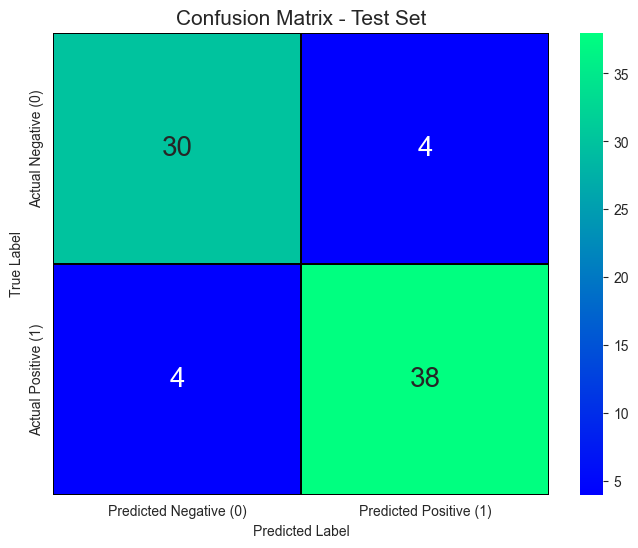

Confusion Matrix displayed.
[[30  4]
 [ 4 38]]


In [64]:
# Evaluate the model's performance on the unseen test data using various metrics.

# --- Confusion Matrix ---
# A confusion matrix C is such that C_ij is equal to the number of observations
# known to be in group i and predicted to be in group j.
# For binary classification (0 and 1):
# cm[0,0] = TN (True Negatives: Actual 0, Predicted 0)
# cm[0,1] = FP (False Positives: Actual 0, Predicted 1)
# cm[1,0] = FN (False Negatives: Actual 1, Predicted 0)
# cm[1,1] = TP (True Positives: Actual 1, Predicted 1)
# (Assuming class 1 is the "positive" class, e.g., disease present)

print("Generating Confusion Matrix for test data...")
cm = confusion_matrix(y_test, y_pred_test)

# Visualize the confusion matrix using a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='winter', linewidths=0.3,
            linecolor='black', annot_kws={"size": 20},
            xticklabels=['Predicted Negative (0)', 'Predicted Positive (1)'], # More descriptive labels
            yticklabels=['Actual Negative (0)', 'Actual Positive (1)'])      # More descriptive labels
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Test Set", fontsize=15)
plt.show()
print("Confusion Matrix displayed.")
print(cm) # Also print the raw matrix

In [65]:
# --- Performance Metrics Calculation (Standard Interpretation) ---
# Assuming class 1 is the "positive" class (e.g., presence of heart disease).
# If your dataset has class 0 as positive, these interpretations would need to be swapped.
if cm.shape == (2, 2): # Ensure it's a 2x2 matrix
    TN = cm[0, 0]  # True Negatives
    FP = cm[0, 1]  # False Positives
    FN = cm[1, 0]  # False Negatives
    TP = cm[1, 1]  # True Positives

    print(f"True Positives (TP): {TP} (Correctly identified as positive)")
    print(f"True Negatives (TN): {TN} (Correctly identified as negative)")
    print(f"False Positives (FP): {FP} (Incorrectly identified as positive - Type I Error)")
    print(f"False Negatives (FN): {FN} (Incorrectly identified as negative - Type II Error)")
    print("-" * 30)

    # 1. Accuracy: Overall correctness of the model.
    # (TP + TN) / (TP + TN + FP + FN)
    testing_accuracy = (TP + TN) / (TP + TN + FN + FP)
    # Or using sklearn's function:
    # testing_accuracy_sklearn = accuracy_score(y_test, y_pred_test)
    print(f"Testing Accuracy for Logistic Regression: {testing_accuracy:.4f}")

    # 2. Sensitivity (Recall or True Positive Rate): Ability to correctly identify positive cases.
    # TP / (TP + FN)
    # tells us how many true positives (points labelled as positive) were recalled or found by our model.
    # Handle division by zero if (TP + FN) is 0, though unlikely with real data.
    testing_sensitivity = TP / (TP + FN) if (TP + FN) > 0 else 0
    # Or using sklearn's function (for positive label 1):
    # testing_sensitivity_sklearn = recall_score(y_test, y_pred_test, pos_label=1)
    print(f"Testing Sensitivity (Recall) for Logistic Regression: {testing_sensitivity:.4f}")

    # 3. Specificity (True Negative Rate): Ability to correctly identify negative cases.
    # TN / (TN + FP)
    testing_specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    # Specificity is recall for the negative class (recall_score(y_test, y_pred_test, pos_label=0))
    print(f"Testing Specificity for Logistic Regression: {testing_specificity:.4f}")

    # 4. Precision (Positive Predictive Value): Proportion of positive predictions that were correct.
    # TP / (TP + FP)
    # basically tells us that out of the results classified as positive by our model, how many were actually positive.
    testing_precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    # Or using sklearn's function (for positive label 1):
    # testing_precision_sklearn = precision_score(y_test, y_pred_test, pos_label=1)
    print(f"Testing Precision for Logistic Regression: {testing_precision:.4f}")

    # 5. F1-Score: Harmonic mean of Precision and Recall.
    # 2 * (Precision * Recall) / (Precision + Recall)
    testing_f1_score = 2 * (testing_precision * testing_sensitivity) / (testing_precision + testing_sensitivity) if (testing_precision + testing_sensitivity) > 0 else 0
    # Or using sklearn's function (for positive label 1):
    # testing_f1_score_sklearn = f1_score(y_test, y_pred_test, pos_label=1)
    print(f"Testing F1-Score for Logistic Regression: {testing_f1_score:.4f}")

else:
    print("Confusion matrix is not 2x2. Manual metric calculation skipped.")
    # Fallback to accuracy if not binary or not 2x2
    testing_accuracy_sklearn = accuracy_score(y_test, y_pred_test)
    print(f"Overall Testing Accuracy: {testing_accuracy_sklearn:.4f}")

True Positives (TP): 38 (Correctly identified as positive)
True Negatives (TN): 30 (Correctly identified as negative)
False Positives (FP): 4 (Incorrectly identified as positive - Type I Error)
False Negatives (FN): 4 (Incorrectly identified as negative - Type II Error)
------------------------------
Testing Accuracy for Logistic Regression: 0.8947
Testing Sensitivity (Recall) for Logistic Regression: 0.9048
Testing Specificity for Logistic Regression: 0.8824
Testing Precision for Logistic Regression: 0.9048
Testing F1-Score for Logistic Regression: 0.9048


In [53]:
# --- Classification Report (More Comprehensive) ---
# Provides precision, recall, F1-score, and support for each class.
print("Classification Report for Test Data:")
# Ensure target_names are appropriate for your classes (e.g., 0: 'No Disease', 1: 'Disease')
# Inferring unique class labels from y_test
class_labels = sorted(pd.Series(y_test).unique())
target_names_auto = [f"Class {label}" for label in class_labels]
if len(class_labels) == 2 and 0 in class_labels and 1 in class_labels:
    target_names_manual = ['No Heart Disease (0)', 'Heart Disease (1)'] # Example names
    report = classification_report(y_test, y_pred_test, target_names=target_names_manual)
else:
    report = classification_report(y_test, y_pred_test, target_names=target_names_auto)

print(report)

Classification Report for Test Data:
                      precision    recall  f1-score   support

No Heart Disease (0)       0.86      0.86      0.86        35
   Heart Disease (1)       0.88      0.88      0.88        41

            accuracy                           0.87        76
           macro avg       0.87      0.87      0.87        76
        weighted avg       0.87      0.87      0.87        76



### *Task 1*

Q: Use HeartDisease dataset and apply LinearRegression and then pass the result to
sigmoid function (write from scratch) and then compare the accuracy of both models.

In [79]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Load the dataset
df = pd.read_csv('heart_disease_dataset_UCI.csv')

# Display the first 5 rows to get a quick overview of the data structure and column names.
print("Dataset Head:")
print(df.head())

# Display concise summary of the DataFrame, including data types and non-null values.
# This helps in identifying potential missing values or incorrect data types.
print("\nDataset Info:")
df.info()

# Display descriptive statistics of numerical columns (e.g., mean, std, min, max).
# Useful for understanding the distribution and range of feature values.
print("\nDataset Description:")
print(df.describe())

# Check for any missing values in each column.
# The sum() method aggregates the count of True (missing) values for each column.
print("\nMissing Values:")
print(df.isnull().sum())

# Separate features (X) and target variable (y).
# .drop(columns=[target_column_name]) creates a new DataFrame without the target column, forming our features.
X = df.drop(columns=['target'])
# Selecting only the target column forms our target variable.
y = df['target']



Dataset Head:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol    

In [ ]:
# Split the dataset into training and testing sets.
# This is a critical step to evaluate the model's generalization ability on unseen data.
# test_size=0.20 means 20% of the data will be used for testing, and 80% for training.
# random_state=42 ensures reproducibility of the split. Running the code again with the same random_state
# will result in the same training and testing data, which is vital for consistent experimentation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print(f"\nShape of X_train: {X_train.shape}") # Number of training samples and features.
print(f"Shape of X_test: {X_test.shape}")   # Number of testing samples and features.
print(f"Shape of y_train: {y_train.shape}") # Number of training target values.
print(f"Shape of y_test: {y_test.shape}")   # Number of testing target values.

# Feature Scaling using StandardScaler.
# Standardization transforms features to have a mean of 0 and a standard deviation of 1.
# Advantages:
# 1. Improves algorithm performance: Many machine learning algorithms perform better when features 
# are on a similar scale because features with larger scales tries dominating the learning process. 
# 2. For iterative optimization algorithms, scaling can lead to a smoother cost function and help 
# the algorithm converge more quickly to the optimal solution.
scaler = StandardScaler()

# Fit the scaler ONLY on the training data.
# This step calculates the mean and standard deviation for each feature from the training data.
# It's crucial to fit only on training data to prevent "data leakage" from the test set.
scaler.fit(X_train)

# Transform both training and testing data using the SAME fitted scaler that learned from the training data.
# This applies the learned mean and standard deviation from the training set to both sets.
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully.")


Shape of X_train: (242, 13)
Shape of X_test: (61, 13)
Shape of y_train: (242,)
Shape of y_test: (61,)

Features scaled successfully.


In [83]:
# Custom Sigmoid Function from Scratch
# The sigmoid function, also known as the logistic function, is a core component of logistic regression
# and many neural networks. Its purpose is to map any real-valued number into a probability between 0 and 1.
# Advantages of Sigmoid:
# 1. Output is between 0 and 1, suitable for binary classification (interpretable as probabilities).
# 2. Differentiable, which is important for gradient-based optimization algorithms.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Linear Regression Model
# We use scikit-learn's LinearRegression to obtain a linear combination of input features.
# This model outputs raw, continuous values which are not directly probabilities.
linear_reg_model = LinearRegression()

# Train the Linear Regression model on the scaled training data.
# The .fit() method finds the optimal coefficients (weights) and intercept that minimize
# the sum of squared differences between predicted and actual y values.
linear_reg_model.fit(X_train_scaled, y_train)

# Generate raw linear predictions on the scaled test data.
# These predictions can be any real number and do not represent probabilities yet.
linear_reg_predictions_raw = linear_reg_model.predict(X_test_scaled)

print("\nRaw Linear Regression Predictions (first 5):")
print(linear_reg_predictions_raw[:5])

# Pass the raw linear regression predictions through our custom sigmoid function.
# This step transforms the continuous linear outputs into values between 0 and 1,
# which can now be interpreted as probabilities for the positive class (e.g., presence of disease).
sigmoid_probabilities = sigmoid(linear_reg_predictions_raw)

print("\nSigmoid Probabilities (first 5):")
print(sigmoid_probabilities[:5])

# Convert the sigmoid probabilities into binary predictions (0 or 1).
# A common threshold of 0.5 is applied:
# If probability >= 0.5, predict class 1.
# If probability < 0.5, predict class 0.
# .astype(int) converts the boolean (True/False) results of the comparison into integers (1/0).
sigmoid_predictions = (sigmoid_probabilities >= 0.5).astype(int)

print("\nBinary Sigmoid Predictions (first 5):")
print(sigmoid_predictions[:5])


Raw Linear Regression Predictions (first 5):
[0.20461609 0.62932079 0.71803669 0.04394647 0.93859572]

Sigmoid Probabilities (first 5):
[0.55097629 0.65233544 0.67217454 0.51098485 0.71881591]

Binary Sigmoid Predictions (first 5):
[1 1 1 1 1]


In [84]:
# Logistic Regression Model (for comparison)
# This is scikit-learn's built-in Logistic Regression classifier.
# It is specifically designed for binary classification and inherently uses the sigmoid function
# and an optimization algorithm to learn the best decision boundary.
# random_state=42 ensures reproducibility of the internal random processes during training.
# solver='liblinear' is a good choice for small datasets and supports L1/L2 regularization.
logistic_reg_model = LogisticRegression(random_state=42, solver='liblinear')

# Train the Logistic Regression model on the scaled training data.
# The .fit() method optimizes the model's parameters to maximize the likelihood of the observed data,
# effectively learning the best weights and bias for classification.
logistic_reg_model.fit(X_train_scaled, y_train)

# Predict class labels directly using the trained Logistic Regression model.
# The .predict() method applies an internal threshold (default 0.5) to the probabilities
# to output the final binary class predictions (0 or 1).
logistic_reg_predictions = logistic_reg_model.predict(X_test_scaled)

# --- Evaluation of Linear Regression + Sigmoid Approach ---
print("\n--- Evaluation of Linear Regression + Sigmoid ---")
# accuracy_score calculates the proportion of correct predictions.
accuracy_linear_sigmoid = accuracy_score(y_test, sigmoid_predictions)
print(f"Accuracy: {accuracy_linear_sigmoid:.4f}")

# classification_report provides a detailed performance summary for classification tasks.
# It includes:
# - Precision: The ability of the classifier not to label as positive a sample that is negative.
# - Recall: The ability of the classifier to find all the positive samples.
# - F1-score: The harmonic mean of precision and recall; a good measure for imbalanced classes.
# - Support: The number of actual occurrences of each class in the specified dataset.
print("\nClassification Report:")
print(classification_report(y_test, sigmoid_predictions))

# --- Evaluation of Logistic Regression Model ---
print("\n--- Evaluation of Logistic Regression ---")
accuracy_logistic_reg = accuracy_score(y_test, logistic_reg_predictions)
print(f"Accuracy: {accuracy_logistic_reg:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, logistic_reg_predictions))

# --- Comparison of Accuracies ---
print("\n--- Comparison ---")
print(f"Accuracy (Linear Regression + Sigmoid): {accuracy_linear_sigmoid:.4f}")
print(f"Accuracy (Logistic Regression): {accuracy_logistic_reg:.4f}")

# Provides a simple comparison statement based on the calculated accuracies.
if accuracy_linear_sigmoid > accuracy_logistic_reg:
    print("\nThe Linear Regression + Sigmoid approach performed better.")
elif accuracy_logistic_reg > accuracy_linear_sigmoid:
    print("\nThe Logistic Regression model performed better.")
else:
    print("\nBoth models performed equally well.")


--- Evaluation of Linear Regression + Sigmoid ---
Accuracy: 0.7213

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.41      0.59        29
           1       0.65      1.00      0.79        32

    accuracy                           0.72        61
   macro avg       0.83      0.71      0.69        61
weighted avg       0.82      0.72      0.69        61


--- Evaluation of Logistic Regression ---
Accuracy: 0.8525

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61


--- Comparison ---
Accuracy (Linear Regression + Sigmoid): 0.7213
Accuracy (Logistic Regression): 0.8525

The Logistic Regression model performed better.


### *Task 2*

Calculate binary cross entropy loss on the above experiment. Write from scratch.

In [86]:
import numpy as np

# Custom Sigmoid Function from Scratch
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Custom Binary Cross-Entropy Loss Function from Scratch
# Binary Cross-Entropy (BCE) is a loss function used to measure the difference
# between predicted probabilities and true binary labels (0 or 1).
# Formula: L = - [y * log(p) + (1 - y) * log(1 - p)] for a single sample,
# where 'y' is the true label and 'p' is the predicted probability of class 1.
# Use: It quantifies how well a model's predicted probabilities align with the actual outcomes.
# Advantages:
# 1. Heavily penalizes confident but incorrect predictions, encouraging the model to be accurate.
# 2. It is a convex function for logistic regression, aiding in finding optimal solutions.
# 3. Works synergistically with sigmoid activation functions.
# Numerical Stability:
# A small epsilon (1e-15) is added to clip predicted probabilities. This prevents
# taking the logarithm of 0 or 1, which would result in undefined values (-infinity or infinity)
# and lead to numerical instability.
def binary_cross_entropy_loss(y_true, y_pred_proba):
    # Clip probabilities to avoid log(0) or log(1) which are undefined.
    # This ensures numerical stability for the logarithm operation.
    epsilon = 1e-15
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)

    # Calculate the loss for each sample.
    # The first term `y_true * np.log(y_pred_proba)` is active when y_true is 1.
    # The second term `(1 - y_true) * np.log(1 - y_pred_proba)` is active when y_true is 0.
    loss = - (y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))

    # Return the mean loss across all samples.
    # The overall loss for the dataset is typically the average loss per sample.
    return np.mean(loss)

# Assuming y_test, sigmoid_probabilities, and logistic_reg_probabilities
# are already defined from the previous steps of data loading, splitting, scaling,
# linear regression prediction, sigmoid transformation, and logistic regression prediction.

# Calculate Binary Cross-Entropy Loss for the Linear Regression + Sigmoid approach.
# y_test: The true binary labels for the test set.
# sigmoid_probabilities: The predicted probabilities from the Linear Regression model
#                        after passing its raw output through the custom sigmoid function.
bce_linear_sigmoid = binary_cross_entropy_loss(y_test, sigmoid_probabilities)
print(f"Binary Cross-Entropy Loss (Linear Regression + Sigmoid): {bce_linear_sigmoid:.4f}")


# For Logistic Regression, we need the predicted probabilities, not just the binary predictions.
# .predict_proba() returns an array of shape (n_samples, n_classes),
# where the second column (index 1) is the probability of the positive class.
logistic_reg_probabilities = logistic_reg_model.predict_proba(X_test_scaled)[:, 1]

# Calculate Binary Cross-Entropy Loss for the Logistic Regression model.
# y_test: The true binary labels for the test set.
# logistic_reg_probabilities: The predicted probabilities from the scikit-learn
#                             Logistic Regression model (obtained via .predict_proba()[:, 1]).
bce_logistic_reg = binary_cross_entropy_loss(y_test, logistic_reg_probabilities)
print(f"Binary Cross-Entropy Loss (Logistic Regression): {bce_logistic_reg:.4f}")

Binary Cross-Entropy Loss (Linear Regression + Sigmoid): 0.5733
Binary Cross-Entropy Loss (Logistic Regression): 0.3652


### *Task#3*

Download a new dataset from UCI Repository https://archive.ics.uci.edu/ml/datasets.php
and evaluate its accuracy on 5 cross fold.

In [94]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [92]:
# Fetch the dataset from UCI Machine Learning Repository
# The 'wine_quality' dataset has ID 186 on the UCI ML Repository.
# This command downloads the dataset directly.
wine_quality = fetch_ucirepo(id=186)

# Extract features (X) and target (y) into pandas DataFrames.
# wine_quality.data.features: Contains the independent variables (e.g., fixed acidity, pH).
# wine_quality.data.targets: Contains the dependent variable (e.g., quality rating of wine).
X = wine_quality.data.features
y = wine_quality.data.targets

# Display the first few rows of the features DataFrame to understand its structure.
print("Features (X) Head:")
print(X.head())

# Display the first few rows of the target DataFrame.
# The target variable 'quality' might need to be binarized for some classification tasks,
# or treated as a multi-class problem directly by Logistic Regression.
print("\nTarget (y) Head:")
print(y.head())

# Check the shape of the features and target dataframes.
print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# The fetch_ucirepo function often returns y as a DataFrame with a single column. 
# Scikit-learn models usually expect y to be a 1-dimensional array (a Series in pandas).
# y.iloc[:, 0] converts the single-column DataFrame y into a pandas Series, which is a 1D array.
if y.ndim > 1 and y.shape[1] == 1:
    y = y.iloc[:, 0] # Select the first (and only) column

print(f"Shape of y: {y.shape}")

print(f"\nUnique values in target variable (y): {y.unique()}")
print(f"Value counts for target variable (y):\n{y.value_counts()}")

# For this dataset, 'quality' ranges from 3 to 9. Logistic Regression can handle multi-class
# classification directly using a 'multinomial' solver.
# For simplicity, we'll let LogisticRegression handle it as a multi-class problem.

Features (X) Head:
   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  
4 

In [98]:
# Initialize KFold cross-validation.
# We will use StratifiedKFold to ensure that each fold has roughly the same
# proportion of target class labels as the complete dataset.
# This is especially important for multi-class classification or imbalanced datasets to avoid biased evaluation.
# n_splits=5 means the data will be split into 5 folds. The model will be trained
# and evaluated 5 times, with a different fold serving as the test set each time.
# shuffle=True ensures the data is randomly shuffled before splitting.
# random_state=42 ensures reproducibility of the splits.
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store accuracy and report from each fold.
fold_accuracies = []

# Initialize StandardScaler outside the loop.
# This scaler will be refit for each fold to ensure proper data scaling
# (fitting on training data, transforming both train and test data for that fold).
scaler = StandardScaler()

# Iterate through each fold of the cross-validation.
# train_index: Indices for the training samples in the current fold.
# test_index: Indices for the testing samples in the current fold.
# kf.split(X, y): Generates pairs of indices for the training and testing sets
for fold, (train_index, test_index) in enumerate(kf.split(X, y)):

    # X.iloc[train_index] selects rows by integer location for training features.
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale the features for the current fold.
    # It's crucial to fit the scaler ONLY on the training data of the current fold
    # to prevent data leakage from the test set of THIS fold.
    scaler.fit(X_train_fold)
    X_train_scaled_fold = scaler.transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # Initialize and train the Logistic Regression model for the current fold.
    # LogisticRegression can handle multi-class classification by default ('ovr' or 'multinomial').
    # 'lbfgs' solver is a good general-purpose solver for multi-class problems.
    # max_iter is increased to ensure convergence for this dataset.
    logistic_reg_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)
    logistic_reg_model.fit(X_train_scaled_fold, y_train_fold)

    # Make predictions on the scaled test data for the current fold.
    y_pred_fold = logistic_reg_model.predict(X_test_scaled_fold)

    # Evaluate the model for the current fold.
    fold_accuracy = accuracy_score(y_test_fold, y_pred_fold)
    fold_accuracies.append(fold_accuracy)

# --- Summarize Cross-Validation Results ---
print("\n--- Cross-Validation Summary ---")
print(f"Average Accuracy across 5 Folds: {np.mean(fold_accuracies):.4f}")
print(f"Standard Deviation of Accuracy across 5 Folds: {np.std(fold_accuracies):.4f}")

# You can also print all individual fold accuracies and reports if needed.
print("\nAll Fold Accuracies:", [ f"{acc:.4f}" for acc in fold_accuracies])


--- Cross-Validation Summary ---
Average Accuracy across 5 Folds: 0.5461
Standard Deviation of Accuracy across 5 Folds: 0.0100

All Fold Accuracies: ['0.5323', '0.5362', '0.5512', '0.5574', '0.5535']


In [100]:
# Final Training on Full Dataset
# We fit the StandardScaler on the entire dataset to prepare it for the final model.
scaler_final = StandardScaler()
X_scaled_full = scaler_final.fit_transform(X)

# Initialize the final Logistic Regression model.
# We use the same configuration as during cross-validation.
final_model = LogisticRegression(random_state=42, solver='lbfgs', max_iter=1000)

# Train the final model on the entire scaled dataset.
final_model.fit(X_scaled_full, y)

# Predict using the final trained model on the same dataset (for training accuracy).
# Note: This is NOT test accuracy, just how well the model fits the training data.
y_pred_full = final_model.predict(X_scaled_full)

# Evaluate the final model by computing the accuracy on the full dataset.
# This shows how well the model fits the entire dataset, but it doesn't generalize performance.
final_accuracy = accuracy_score(y, y_pred_full)

print("\n--- Final Model Training on Full Dataset ---")
print(f"Training Accuracy on Full Dataset: {final_accuracy:.4f}")



--- Final Model Training on Full Dataset ---
Training Accuracy on Full Dataset: 0.5464


### *Task #4*

Consider a logistic regression model with:  
- **w1 = 0.5**,  
- **w2 = 0.31**,  
- **b = 0.09**,  
- **X1 = 5**,  
- **X2 = 3**,  
- **Actual y = 1**

Write the following functions from scratch:
- ForwardPropagation()
- LossCalculation()
- BackwardPropagation() *(This function must update the old weights)*
- MainLoop() *(This must iterate 5 times and call all the above functions)*


In [113]:
import numpy as np

# Global variables for weights and bias
# Initialized with the given values for the logistic regression model.
w1 = 0.5
w2 = 0.31
b = 0.09

# Global variables for input features
# These are the specific input values for this task.
X1 = 5
X2 = 3

# Global variable for the actual target value
# This is the true label we are trying to predict.
y_actual = 1

# Learning rate for gradient descent
# This is a hyperparameter crucial for the BackwardPropagation function. The learning rate determines the 
# step size taken during gradient descent when updating the weights and bias. A smaller learning rate means 
# smaller steps, potentially leading to more stable but slower convergence. A larger learning rate means bigger 
# steps, which can lead to faster convergence but might also cause the optimization to overshoot the minimum.
learning_rate = 0.01

In [114]:
# returns a(output of sigmoid) 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [115]:
# Function: ForwardPropagation()
# Use: This function performs the forward pass of the logistic regression model.
# It calculates the predicted probability (y_predicted) based on the current
# weights (w1, w2), bias (b), and input features (X1, X2).
# Mechanism:
# 1. Calculates the linear combination of inputs, weights, and bias (z = w1*X1 + w2*X2 + b).
#    This 'z' value is often called the 'logit'.
# 2. Passes the 'z' value through the sigmoid function to get the predicted probability.
# Returns: The calculated predicted probability (y_predicted).
def ForwardPropagation():
    global w1, w2, b, X1, X2 # Declare globals to access them
    
    # Calculate the linear combination (z)
    z = (w1 * X1) + (w2 * X2) + b
    
    # Pass through the sigmoid activation function to get the predicted probability
    y_predicted = sigmoid(z)
    
    return y_predicted

In [116]:
# Function: LossCalculation()
# Use: This function calculates the Binary Cross-Entropy (BCE) loss, which is a
# standard loss function for binary classification problems. It quantifies how
# well the predicted probability (y_predicted) aligns with the actual target (y_actual).
# Mechanism:
# 1. Applies numerical stability clipping to y_predicted to avoid log(0) issues.
# 2. Calculates the BCE loss using the formula:
#    L = - [y_actual * log(y_predicted) + (1 - y_actual) * log(1 - y_predicted)]
# Advantage: Penalizes confident, incorrect predictions heavily, driving the model
# to learn accurate probabilities.
# Returns: The calculated BCE loss.
def LossCalculation(y_predicted):
    global y_actual # Declare global to access actual target
    
    # Add a small epsilon for numerical stability to prevent log(0)
    epsilon = 1e-15
    y_predicted_clipped = np.clip(y_predicted, epsilon, 1 - epsilon)
    
    # Calculate Binary Cross-Entropy Loss
    loss = - (y_actual * np.log(y_predicted_clipped) + (1 - y_actual) * np.log(1 - y_predicted_clipped))
    
    return loss

In [ ]:
# Function: BackwardPropagation() - MODIFIED TO MATCH YOUR CHAIN RULE EXPLICITLY
# Use: This function calculates the gradients of the loss with respect to the
# weights (dw1, dw2) and bias (db) by explicitly computing each term of the
# chain rule as you derived on paper. It then updates these parameters using
# gradient descent. This method clearly shows the step-by-step derivative flow.
#
# Mechanism (Explicit Chain Rule Breakdown):
# For dL/dw1 = dL/da * da/dz * dz/dw1
# 1. dL/da: Derivative of Binary Cross-Entropy Loss (L) w.r.t. predicted probability (a, or y_predicted).
#    This term quantifies how a change in the predicted probability affects the loss.
# 2. da/dz: Derivative of the Sigmoid activation (a) w.r.t. its input (z).
#    This term quantifies how a change in the linear combination (z) affects the predicted probability.
# 3. dz/dw1: Derivative of the linear combination (z) w.r.t. weight w1.
#    This term quantifies how a change in w1 affects the linear combination.
# The products of these terms give the overall gradient for each parameter.
# Finally, weights and bias are updated using the gradient descent rule.
# Returns: None (updates global w1, w2, b directly)
def BackwardPropagation(y_predicted):
    global w1, w2, b, X1, X2, y_actual, learning_rate # Declare globals to modify them

    # --- Step 1: Calculate dL/da (Derivative of Loss w.r.t. Sigmoid Output 'a' or y_predicted) ---
    # L = - [y_actual * log(a) + (1 - y_actual) * log(1 - a)]
    # dL/da = (a - y_actual) / (a * (1 - a))
    
    # Ensure y_predicted is clipped for numerical stability before using in the derivative.
    epsilon = 1e-15
    a_clipped = np.clip(y_predicted, epsilon, 1 - epsilon)
    
    dL_da = (a_clipped - y_actual) / (a_clipped * (1 - a_clipped))
    print(f"  dL/da: {dL_da:.4f}")

    # --- Step 2: Calculate da/dz (Derivative of Sigmoid Output 'a' w.r.t. its input 'z') ---
    # a = sigmoid(z)
    # da/dz = a * (1 - a)
    da_dz = a_clipped * (1 - a_clipped) # Use the clipped 'a' for consistency
    print(f"  da/dz: {da_dz:.4f}")

    # --- Step 3: Calculate dz/dw1, dz/dw2, dz/db (Derivative of z w.r.t. parameters) ---
    # z = w1*X1 + w2*X2 + b
    dz_dw1 = X1
    dz_dw2 = X2
    dz_db = 1
    print(f"  dz/dw1: {dz_dw1}, dz/dw2: {dz_dw2}, dz/db: {dz_db}")

    # --- Step 4: Combine using the Chain Rule to get the gradients ---
    # dL/dw1 = dL/da * da/dz * dz/dw1
    # dL/dw2 = dL/da * da/dz * dz/dw2
    # dL/db = dL/da * da/dz * dz/db
    
    dw1 = dL_da * da_dz * dz_dw1
    dw2 = dL_da * da_dz * dz_dw2
    db = dL_da * da_dz * dz_db
    
    print(f"  Calculated Gradients (explicit chain): dw1={dw1:.4f}, dw2={dw2:.4f}, db={db:.4f}")

    # --- Step 5: Update weights and bias using Gradient Descent ---
    w1 = w1 - learning_rate * dw1
    w2 = w2 - learning_rate * dw2
    b = b - learning_rate * db
    
    print(f"  Updated Parameters: w1={w1:.4f}, w2={w2:.4f}, b={b:.4f}")

In [118]:
# Use: This simulates the iterative learning process of a machine learning model.
# Mechanism:
# 1. Loops for a predefined number of `iterations`.
# 2. In each iteration (epoch):
#    a. Calls ForwardPropagation to get the model's current prediction.
#    b. Calls LossCalculation to evaluate how good the prediction is.
#    c. Calls BackwardPropagation to update the model's parameters (weights and bias)
#       based on the calculated loss and gradients.
def MainLoop():
    print("\n--- Starting Main Loop ---")
    
    # Iterate 5 times (epochs) to simulate the training process.
    # Each iteration involves a forward pass, loss calculation, and backward pass.
    for i in range(5):
        print(f"\nEpoch {i+1}:")
        
        # 1. Forward Propagation: Calculate the predicted probability
        y_predicted = ForwardPropagation()
        print(f"  Predicted Probability: {y_predicted:.4f}")
        
        # 2. Loss Calculation: Evaluate the error
        loss = LossCalculation(y_predicted)
        print(f"  Loss: {loss:.4f}")
        
        # 3. Backward Propagation: Calculate gradients and update parameters
        # This function modifies the global w1, w2, b directly.
        BackwardPropagation(y_predicted)
        
    print("\n--- Main Loop Finished ---")
    print("\nFinal Parameters:")
    print(f"w1: {w1:.4f}, w2: {w2:.4f}, b: {b:.4f}")
    
    # Final prediction with updated parameters
    final_z = (w1 * X1) + (w2 * X2) + b
    final_y_predicted = sigmoid(final_z)
    print(f"Final Predicted Probability for X1={X1}, X2={X2}: {final_y_predicted:.4f}")
    
    # Final loss with updated parameters
    final_loss = LossCalculation(final_y_predicted)
    print(f"Final Loss: {final_loss:.4f}")

# Call the main loop to run the training process
MainLoop()


--- Starting Main Loop ---

Epoch 1:
  Predicted Probability: 0.9713
  Loss: 0.0292
  dL/da: -1.0296
  da/dz: 0.0279
  dz/dw1: 5, dz/dw2: 3, dz/db: 1
  Calculated Gradients (explicit chain): dw1=-0.1437, dw2=-0.0862, db=-0.0287
  Updated Parameters: w1=0.5014, w2=0.3109, b=0.0903

Epoch 2:
  Predicted Probability: 0.9715
  Loss: 0.0289
  dL/da: -1.0293
  da/dz: 0.0277
  dz/dw1: 5, dz/dw2: 3, dz/db: 1
  Calculated Gradients (explicit chain): dw1=-0.1423, dw2=-0.0854, db=-0.0285
  Updated Parameters: w1=0.5029, w2=0.3117, b=0.0906

Epoch 3:
  Predicted Probability: 0.9718
  Loss: 0.0286
  dL/da: -1.0290
  da/dz: 0.0274
  dz/dw1: 5, dz/dw2: 3, dz/db: 1
  Calculated Gradients (explicit chain): dw1=-0.1410, dw2=-0.0846, db=-0.0282
  Updated Parameters: w1=0.5043, w2=0.3126, b=0.0909

Epoch 4:
  Predicted Probability: 0.9721
  Loss: 0.0283
  dL/da: -1.0287
  da/dz: 0.0271
  dz/dw1: 5, dz/dw2: 3, dz/db: 1
  Calculated Gradients (explicit chain): dw1=-0.1396, dw2=-0.0838, db=-0.0279
  Updated